본 강좌에서는 간단한 순환 신경망 모델을 만들어봅니다. Example script showing how to use stateful RNNs
to model long sequences efficiently. 늘 그렇듯이 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 데이터셋 준비하기

Generates an absolute cosine time series with the amplitude exponentially decreasing
Arguments:
    amp: amplitude of the cosine function
    period: period of the cosine function
    x0: initial x of the time series
    xn: final x of the time series
    step: step of the time series discretization
    k: exponential rate

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 25
# number of elements ahead that are used to make the prediction
lahead = 1

def gen_cosine_amp(amp=100, period=1000, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(2 * np.pi * idx / period)
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos

print('Generating Data')
cos = gen_cosine_amp()
print('Input shape:', cos.shape)

expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)

Generating Data
Input shape: (50000, 1, 1)
Output shape
(50000, 1)


---

### 모델 구성하기


In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Create model

model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               return_sequences=False,
               stateful=True))
model.add(Dense(1))

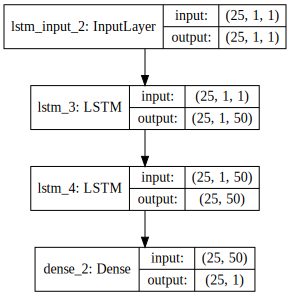

In [5]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

# brew install graphviz
# pip uninstall -y pydot
# pip install pydot-ng

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-CNN_Getting_Started-2.svg)

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [6]:
# Compile model
model.compile(loss='mse', optimizer='rmsprop')

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [7]:
# Fit the model

print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              nb_epoch=1,
              shuffle=False)
    model.reset_states()

Training
Epoch 0 / 25
Epoch 1/1
50000/50000 [==============================] - 11s - loss: 340.8462    
Epoch 1 / 25
Epoch 1/1
50000/50000 [==============================] - 7s - loss: 162.9297     
Epoch 2 / 25
Epoch 1/1
50000/50000 [==============================] - 9s - loss: 80.2716     
Epoch 3 / 25
Epoch 1/1
50000/50000 [==============================] - 9s - loss: 48.7960     
Epoch 4 / 25
Epoch 1/1
50000/50000 [==============================] - 9s - loss: 29.8102     
Epoch 5 / 25
Epoch 1/1
50000/50000 [==============================] - 10s - loss: 21.4720    
Epoch 6 / 25
Epoch 1/1
50000/50000 [==============================] - 10s - loss: 16.4181    
Epoch 7 / 25
Epoch 1/1
50000/50000 [==============================] - 14s - loss: 12.3207    
Epoch 8 / 25
Epoch 1/1
50000/50000 [==============================] - 12s - loss: 9.8400    
Epoch 9 / 25
Epoch 1/1
50000/50000 [==============================] - 12s - loss: 7.9344    
Epoch 10 / 25
Epoch 1/1
50000/50000 [==============

---

### 모델 사용하기

Predicting
Plotting Results


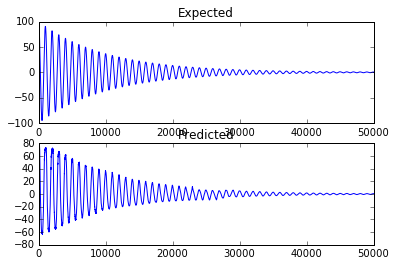

In [8]:
# evaliuate

print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Plotting Results')
plt.subplot(2, 1, 1)
plt.plot(expected_output)
plt.title('Expected')
plt.subplot(2, 1, 2)
plt.plot(predicted_output)
plt.title('Predicted')
plt.show()

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)
* 이전 : [딥러닝 기본 실습/다층 퍼셉트론 모델 만들어보기](https://tykimos.github.io/2017/02/04/MLP_Getting_Started/)
* 다음 : [딥러닝 기본 실습/오토인코더 모델 만들어보기](https://tykimos.github.io/2017/02/04/AutoEncoder_Getting_Started/)